In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime

warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (14, 7)

print("✓ Libraries imported successfully")
print(f"Analysis Date: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")

✓ Libraries imported successfully
Analysis Date: 2025-12-14 20:24:59


In [3]:
df = pd.read_csv('D:\My projects\customer_segmentation_project\data\processed\step2_rfm_analyzed.csv')
print(f"  Shape: {df.shape[0]:,} customers, {df.shape[1]} features")

initial_columns = len(df.columns)
existing_cols=df.columns.to_list()
print(f"  Columns: {existing_cols}")
print(f"\nStarting with {initial_columns} features")
df.head()

  Shape: 2,229 customers, 43 features
  Columns: ['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response', 'Age', 'Total_Spending', 'Total_Purchases', 'Children', 'Customer_Tenure_Days', 'R_Value', 'F_Value', 'M_Value', 'R_Score', 'F_Score', 'M_Score', 'RFM_Segment', 'RFM_Score', 'Customer_Segment']

Starting with 43 features


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Customer_Tenure_Days,R_Value,F_Value,M_Value,R_Score,F_Score,M_Score,RFM_Segment,RFM_Score,Customer_Segment
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,663,58,25,1617,3,5,5,355,13,Loyal Customers
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,113,38,6,27,4,1,1,411,6,New Customers
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,312,26,21,776,4,4,4,444,12,Champions
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,139,26,8,53,4,2,1,421,7,Potential Loyalists
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,161,94,19,422,1,4,3,143,8,At Risk


In [4]:
print(f"\n✅ Verified base features:")
base_features_check = {
    'RFM Scores': ['R_Score', 'F_Score', 'M_Score'],
    'Demographics': ['Age', 'Income', 'Education', 'Marital_Status'],
    'Children': ['Kidhome', 'Teenhome', 'Children'],
    'Spending': ['Total_Spending', 'Total_Purchases'],
    'Products': ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'],
    'Channels': ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumDealsPurchases'],
    'Engagement': ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'NumWebVisitsMonth', 'Complain'],
    'Time': ['Customer_Tenure_Days', 'Recency']
}

for category, features in base_features_check.items():
    available = [f for f in features if f in existing_cols]
    print(f"  {category}: {len(available)}/{len(features)} available")


✅ Verified base features:
  RFM Scores: 3/3 available
  Demographics: 4/4 available
  Children: 3/3 available
  Spending: 2/2 available
  Products: 6/6 available
  Channels: 4/4 available
  Engagement: 8/8 available
  Time: 2/2 available


In [5]:
#  Demographics features
education_order = {'Basic': 1, '2n Cycle': 2, 'Graduation': 3, 'Master': 4, 'PhD': 5}
df['Education_Level'] = df['Education'].map(education_order)
if 'Children' not in df.columns:
    df['Children'] = df['Kidhome'] + df['Teenhome']

has_partner = df['Marital_Status'].apply(lambda x: 1 if x in ['Married', 'Together'] else 0)
df['Family_Size'] = df['Children'] + has_partner + 1  # +1 for customer

# Has Children (binary)
df['Has_Children'] = (df['Children'] > 0).astype(int)


In [6]:
# Spending Behavior
df['Avg_Order_Value'] = df['Total_Spending'] / (df['Total_Purchases'] + 1)  # Avoid division by zero
df['Purchase_Frequency_Rate'] = df['Total_Purchases'] / (df['Customer_Tenure_Days'] + 1)

In [7]:
#  Product Preferences

product_cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 
                'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

#  Wine Ratio (most popular category)
df['Wine_Ratio'] = df['MntWines'] / (df['Total_Spending'] + 1)
#  Meat Ratio (premium category)
df['Meat_Ratio'] = df['MntMeatProducts'] / (df['Total_Spending'] + 1)
#  Product Diversity (how many categories purchased)
df['Product_Diversity'] = (df[product_cols] > 0).sum(axis=1)
# Premium Product Ratio (wines + meat + fish)
df['Premium_Product_Ratio'] = (df['MntWines'] + df['MntMeatProducts'] + 
                                df['MntFishProducts']) / (df['Total_Spending'] + 1)
print(f"\n✓ Product Preferences complete: 4 features")
print(f"  • Wine buyers: {(df['Wine_Ratio'] > 0).sum()} ({(df['Wine_Ratio'] > 0).mean()*100:.1f}%)")
print(f"  • Meat buyers: {(df['Meat_Ratio'] > 0).sum()} ({(df['Meat_Ratio'] > 0).mean()*100:.1f}%)")
print(f"  • Avg Product Diversity: {df['Product_Diversity'].mean():.1f} categories")
print(f"  • Premium buyers: {(df['Premium_Product_Ratio'] > 0.5).sum()} ({(df['Premium_Product_Ratio'] > 0.5).mean()*100:.1f}%)")



✓ Product Preferences complete: 4 features
  • Wine buyers: 2216 (99.4%)
  • Meat buyers: 2228 (100.0%)
  • Avg Product Diversity: 5.4 categories
  • Premium buyers: 2056 (92.2%)


In [8]:
# Channel Preferences (2 Features)
# Web Purchase Ratio
df['Web_Purchase_Ratio'] = df['NumWebPurchases'] / (df['Total_Purchases'] + 1)
# Store Purchase Ratio
df['Store_Purchase_Ratio'] = df['NumStorePurchases'] / (df['Total_Purchases'] + 1)

print(f"\n✓ Channel Preferences complete: 2 features")
print(f"  • Web-first customers: {(df['Web_Purchase_Ratio'] > 0.5).sum()} ({(df['Web_Purchase_Ratio'] > 0.5).mean()*100:.1f}%)")
print(f"  • Store-first customers: {(df['Store_Purchase_Ratio'] > 0.5).sum()} ({(df['Store_Purchase_Ratio'] > 0.5).mean()*100:.1f}%)")



✓ Channel Preferences complete: 2 features
  • Web-first customers: 6 (0.3%)
  • Store-first customers: 136 (6.1%)


In [9]:
#  Engagement (4 Features)
campaign_cols = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 
                 'AcceptedCmp4', 'AcceptedCmp5', 'Response']
#Campaign Acceptance Rate
df['Campaign_Acceptance_Rate'] = df[campaign_cols].sum(axis=1) / len(campaign_cols)
# Website Visits per Month
# Has Complained (binary)
df['Has_Complained'] = df['Complain']
# Engagement Score (composite metric)
df['Engagement_Score'] = (
    df[campaign_cols].sum(axis=1) * 2 +  # Campaigns weighted 2x
    df['Total_Purchases'] +
    df['NumWebVisitsMonth'] / 5  # Normalize website visits
)
print(f"\n✓ Engagement complete: 4 features")
print(f"  • Campaign responders: {(df['Campaign_Acceptance_Rate'] > 0).sum()} ({(df['Campaign_Acceptance_Rate'] > 0).mean()*100:.1f}%)")
print(f"  • Avg website visits: {df['NumWebVisitsMonth'].mean():.1f} per month")
print(f"  • Complainers: {df['Has_Complained'].sum()} ({df['Has_Complained'].mean()*100:.1f}%)")
print(f"  • Avg Engagement Score: {df['Engagement_Score'].mean():.1f}")



✓ Engagement complete: 4 features
  • Campaign responders: 608 (27.3%)
  • Avg website visits: 5.3 per month
  • Complainers: 20 (0.9%)
  • Avg Engagement Score: 16.8


In [10]:
#  Value Metrics (2 Features)
#Customer Lifetime Value (CLV) Estimate
customer_tenure_years = df['Customer_Tenure_Days'] / 365
df['CLV_Estimate'] = (
    df['Avg_Order_Value'] * 
    df['Total_Purchases'] * 
    np.maximum(customer_tenure_years, 1)  # At least 1 year
)
#Customer Value Score (0-100 scale based on RFM)
df['Customer_Value_Score'] = (
    (df['RFM_Score'] - df['RFM_Score'].min()) / 
    (df['RFM_Score'].max() - df['RFM_Score'].min()) * 100
)

print(f"\n✓ Value Metrics complete: 2 features")
print(f"  • Avg CLV: ${df['CLV_Estimate'].mean():,.2f}")
print(f"  • Avg Value Score: {df['Customer_Value_Score'].mean():.1f}/100")



✓ Value Metrics complete: 2 features
  • Avg CLV: $730.25
  • Avg Value Score: 49.5/100


In [11]:
# Binary Flags (5 Features)
#High Spender (top 25%)
df['Is_High_Spender'] = (df['Total_Spending'] >= df['Total_Spending'].quantile(0.75)).astype(int)
#Active Customer (purchased in last 90 days)
df['Is_Active'] = (df['Recency'] <= 90).astype(int)
# Campaign Responder
df['Is_Campaign_Responder'] = (df[campaign_cols].sum(axis=1) > 0).astype(int)
#Web Shopper (>50% purchases online)
df['Is_Web_Shopper'] = (df['Web_Purchase_Ratio'] > 0.5).astype(int)
# Deal Seeker (uses deals frequently)
df['Is_Deal_Seeker'] = (df['NumDealsPurchases'] / (df['Total_Purchases'] + 1) > 0.3).astype(int)

print(f"\n✓ Binary Flags complete: 5 features")
for flag in ['Is_High_Spender', 'Is_Active', 'Is_Campaign_Responder', 
             'Is_Web_Shopper', 'Is_Deal_Seeker']:
    count = df[flag].sum()
    pct = (count / len(df) * 100)
    print(f"  • {flag}: {count:,} ({pct:.1f}%)")



✓ Binary Flags complete: 5 features
  • Is_High_Spender: 558 (25.0%)
  • Is_Active: 2,033 (91.2%)
  • Is_Campaign_Responder: 608 (27.3%)
  • Is_Web_Shopper: 6 (0.3%)
  • Is_Deal_Seeker: 182 (8.2%)


In [12]:
# List all optimized features
optimized_features = [
    # RFM Scores (3)
    'R_Score', 'F_Score', 'M_Score',
    
    # Demographics (5)
    'Age', 'Income', 'Education_Level', 'Family_Size', 'Has_Children',
    
    # Spending Behavior (3)
    'Avg_Order_Value', 'Purchase_Frequency_Rate', 'Customer_Tenure_Days',
    
    # Product Preferences (4)
    'Wine_Ratio', 'Meat_Ratio', 'Product_Diversity', 'Premium_Product_Ratio',
    
    # Channel Preferences (2)
    'Web_Purchase_Ratio', 'Store_Purchase_Ratio',
    
    # Engagement (4)
    'Campaign_Acceptance_Rate', 'NumWebVisitsMonth', 'Has_Complained', 'Engagement_Score',
    
    # Value Metrics (2)
    'CLV_Estimate', 'Customer_Value_Score',
    
    # Binary Flags (5)
    'Is_High_Spender', 'Is_Active', 'Is_Campaign_Responder', 
    'Is_Web_Shopper', 'Is_Deal_Seeker'
]

# Check which features exist
existing_optimized = [f for f in optimized_features if f in df.columns]

print(f"\nOptimized Feature Breakdown:")
print(f"  1. RFM Scores: 3 features")
print(f"  2. Demographics: 5 features")
print(f"  3. Spending Behavior: 3 features")
print(f"  4. Product Preferences: 4 features")
print(f"  5. Channel Preferences: 2 features")
print(f"  6. Engagement: 4 features")
print(f"  7. Value Metrics: 2 features")
print(f"  8. Binary Flags: 5 features")
print(f"  " + "-"*40)
print(f"  TOTAL: {len(existing_optimized)} features")

print(f"\nComparison:")
print(f"  Original features: {initial_columns}")
print(f"  New features created: {len(df.columns) - initial_columns}")
print(f"  Total features now: {len(df.columns)}")
print(f"  Features for clustering: {len(existing_optimized)}")
print(f"  Reduction: {len(df.columns) - len(existing_optimized)} features excluded from clustering")



Optimized Feature Breakdown:
  1. RFM Scores: 3 features
  2. Demographics: 5 features
  3. Spending Behavior: 3 features
  4. Product Preferences: 4 features
  5. Channel Preferences: 2 features
  6. Engagement: 4 features
  7. Value Metrics: 2 features
  8. Binary Flags: 5 features
  ----------------------------------------
  TOTAL: 28 features

Comparison:
  Original features: 43
  New features created: 21
  Total features now: 64
  Features for clustering: 28
  Reduction: 36 features excluded from clustering


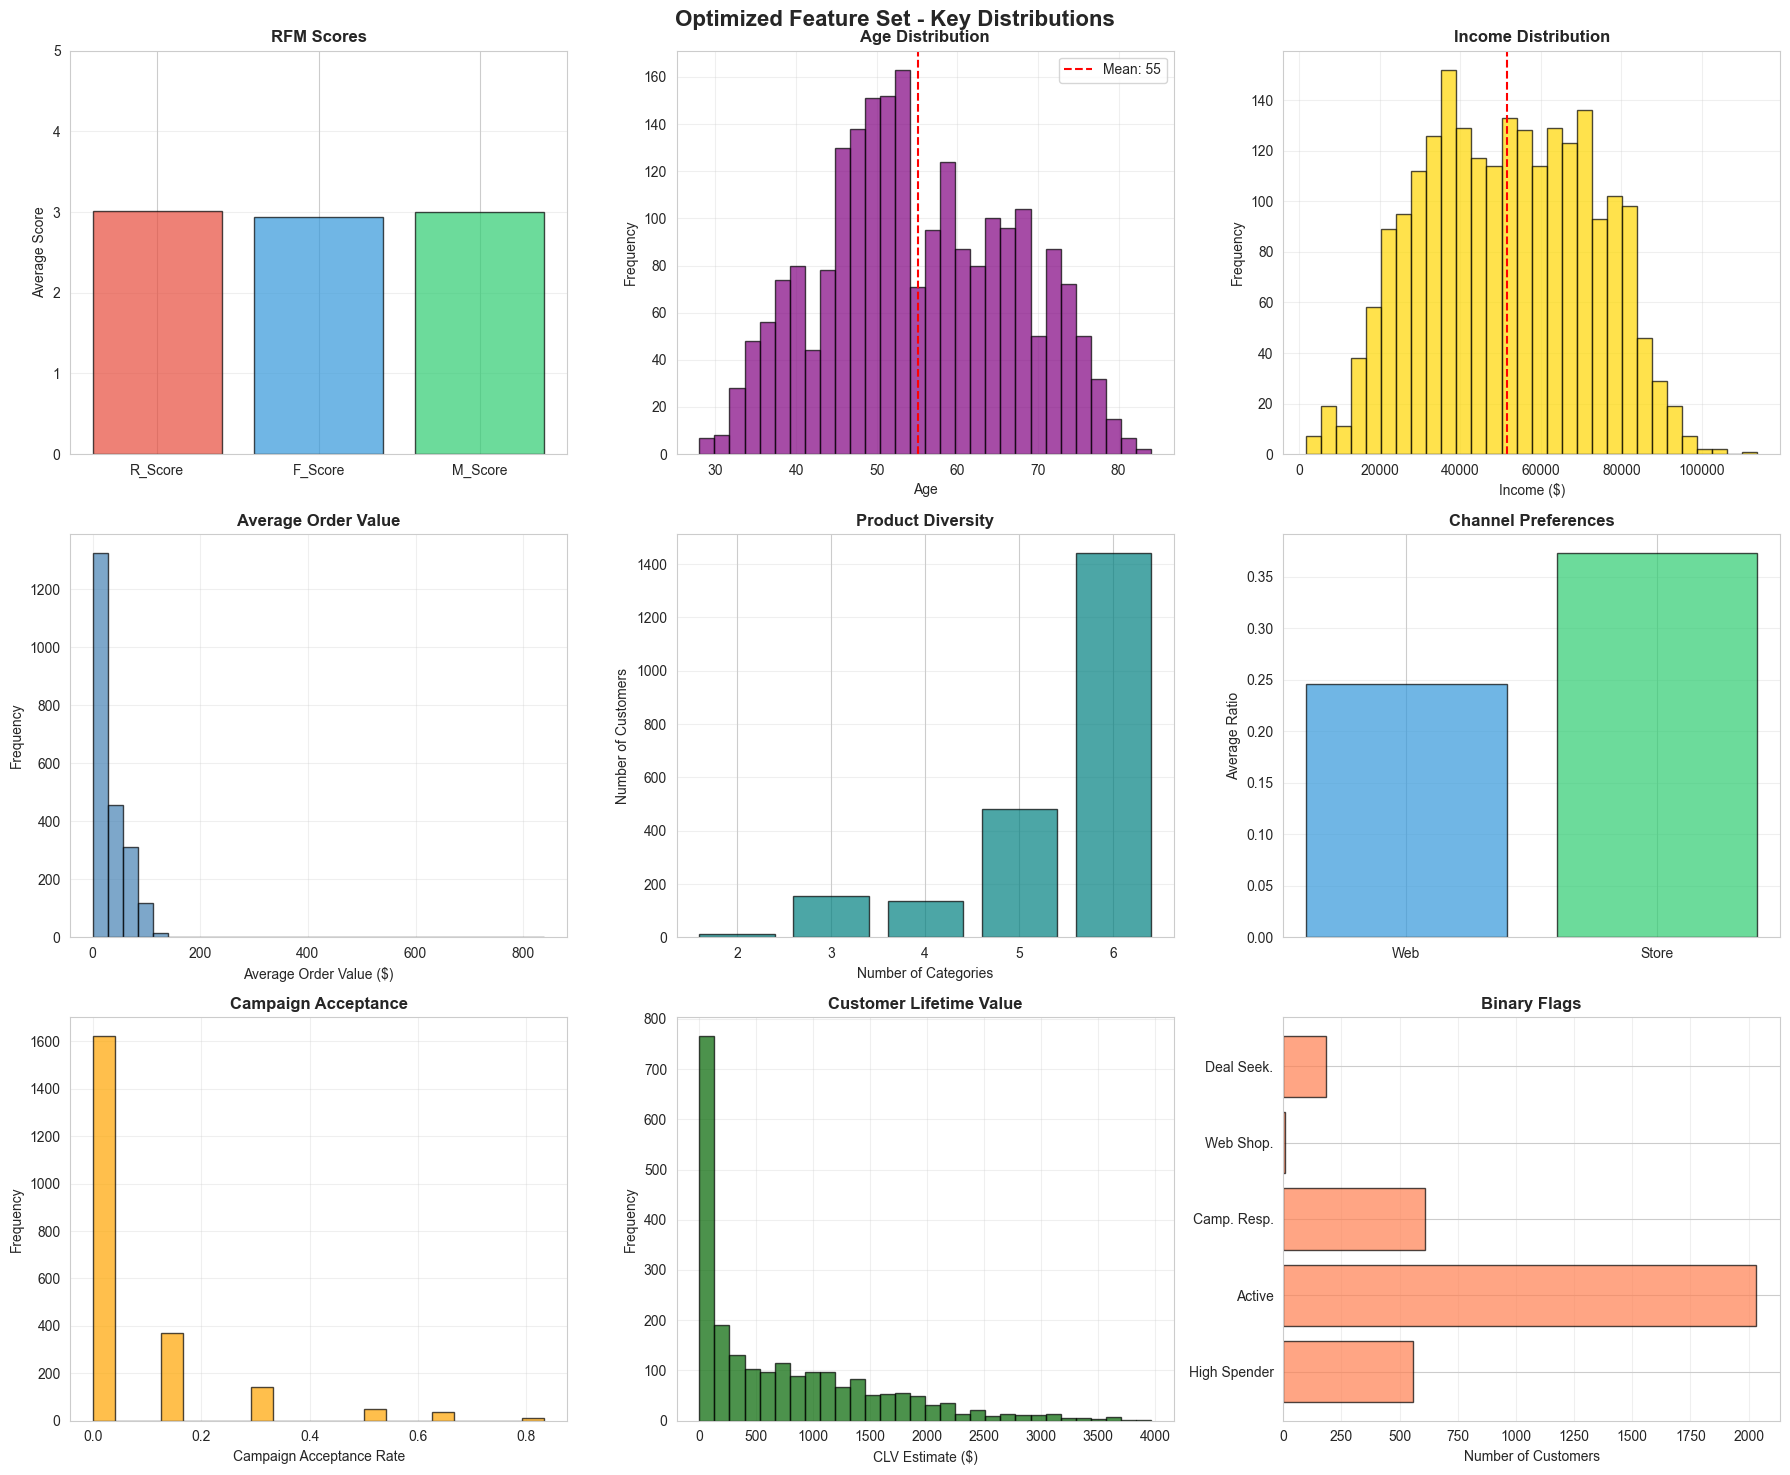


✓ Feature visualization saved to: outputs/figures/step3_optimized_features.png


In [13]:
#  Visualize Optimized Features

fig, axes = plt.subplots(3, 3, figsize=(18, 15))
fig.suptitle('Optimized Feature Set - Key Distributions', fontsize=16, fontweight='bold')

# 1. RFM Scores
rfm_data = df[['R_Score', 'F_Score', 'M_Score']].mean()
axes[0, 0].bar(rfm_data.index, rfm_data.values, color=['#e74c3c', '#3498db', '#2ecc71'], 
              alpha=0.7, edgecolor='black')
axes[0, 0].set_ylabel('Average Score')
axes[0, 0].set_title('RFM Scores', fontweight='bold')
axes[0, 0].set_ylim([0, 5])
axes[0, 0].grid(axis='y', alpha=0.3)

# 2. Demographics - Age
axes[0, 1].hist(df['Age'], bins=30, color='purple', alpha=0.7, edgecolor='black')
axes[0, 1].axvline(df['Age'].mean(), color='red', linestyle='--', label=f'Mean: {df["Age"].mean():.0f}')
axes[0, 1].set_xlabel('Age')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('Age Distribution', fontweight='bold')
axes[0, 1].legend()
axes[0, 1].grid(alpha=0.3)

# 3. Demographics - Income
axes[0, 2].hist(df['Income'], bins=30, color='gold', alpha=0.7, edgecolor='black')
axes[0, 2].axvline(df['Income'].mean(), color='red', linestyle='--')
axes[0, 2].set_xlabel('Income ($)')
axes[0, 2].set_ylabel('Frequency')
axes[0, 2].set_title('Income Distribution', fontweight='bold')
axes[0, 2].grid(alpha=0.3)

# 4. Spending - AOV
axes[1, 0].hist(df['Avg_Order_Value'], bins=30, color='steelblue', alpha=0.7, edgecolor='black')
axes[1, 0].set_xlabel('Average Order Value ($)')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Average Order Value', fontweight='bold')
axes[1, 0].grid(alpha=0.3)

# 5. Product - Diversity
diversity_counts = df['Product_Diversity'].value_counts().sort_index()
axes[1, 1].bar(diversity_counts.index, diversity_counts.values, color='teal', alpha=0.7, edgecolor='black')
axes[1, 1].set_xlabel('Number of Categories')
axes[1, 1].set_ylabel('Number of Customers')
axes[1, 1].set_title('Product Diversity', fontweight='bold')
axes[1, 1].grid(axis='y', alpha=0.3)

# 6. Channel - Web vs Store
channel_data = [df['Web_Purchase_Ratio'].mean(), df['Store_Purchase_Ratio'].mean()]
axes[1, 2].bar(['Web', 'Store'], channel_data, color=['#3498db', '#2ecc71'], alpha=0.7, edgecolor='black')
axes[1, 2].set_ylabel('Average Ratio')
axes[1, 2].set_title('Channel Preferences', fontweight='bold')
axes[1, 2].grid(axis='y', alpha=0.3)

# 7. Engagement - Campaign Rate
axes[2, 0].hist(df['Campaign_Acceptance_Rate'], bins=20, color='orange', alpha=0.7, edgecolor='black')
axes[2, 0].set_xlabel('Campaign Acceptance Rate')
axes[2, 0].set_ylabel('Frequency')
axes[2, 0].set_title('Campaign Acceptance', fontweight='bold')
axes[2, 0].grid(alpha=0.3)

# 8. Value - CLV
axes[2, 1].hist(df['CLV_Estimate'], bins=30, color='darkgreen', alpha=0.7, edgecolor='black')
axes[2, 1].set_xlabel('CLV Estimate ($)')
axes[2, 1].set_ylabel('Frequency')
axes[2, 1].set_title('Customer Lifetime Value', fontweight='bold')
axes[2, 1].grid(alpha=0.3)

# 9. Binary Flags
flag_counts = [df[flag].sum() for flag in ['Is_High_Spender', 'Is_Active', 
                                             'Is_Campaign_Responder', 'Is_Web_Shopper', 'Is_Deal_Seeker']]
axes[2, 2].barh(['High Spender', 'Active', 'Camp. Resp.', 'Web Shop.', 'Deal Seek.'], 
               flag_counts, color='coral', alpha=0.7, edgecolor='black')
axes[2, 2].set_xlabel('Number of Customers')
axes[2, 2].set_title('Binary Flags', fontweight='bold')
axes[2, 2].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.savefig('D://My projects/customer_segmentation_project/outputs/figures/step3_optimized_features.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Feature visualization saved to: outputs/figures/step3_optimized_features.png")


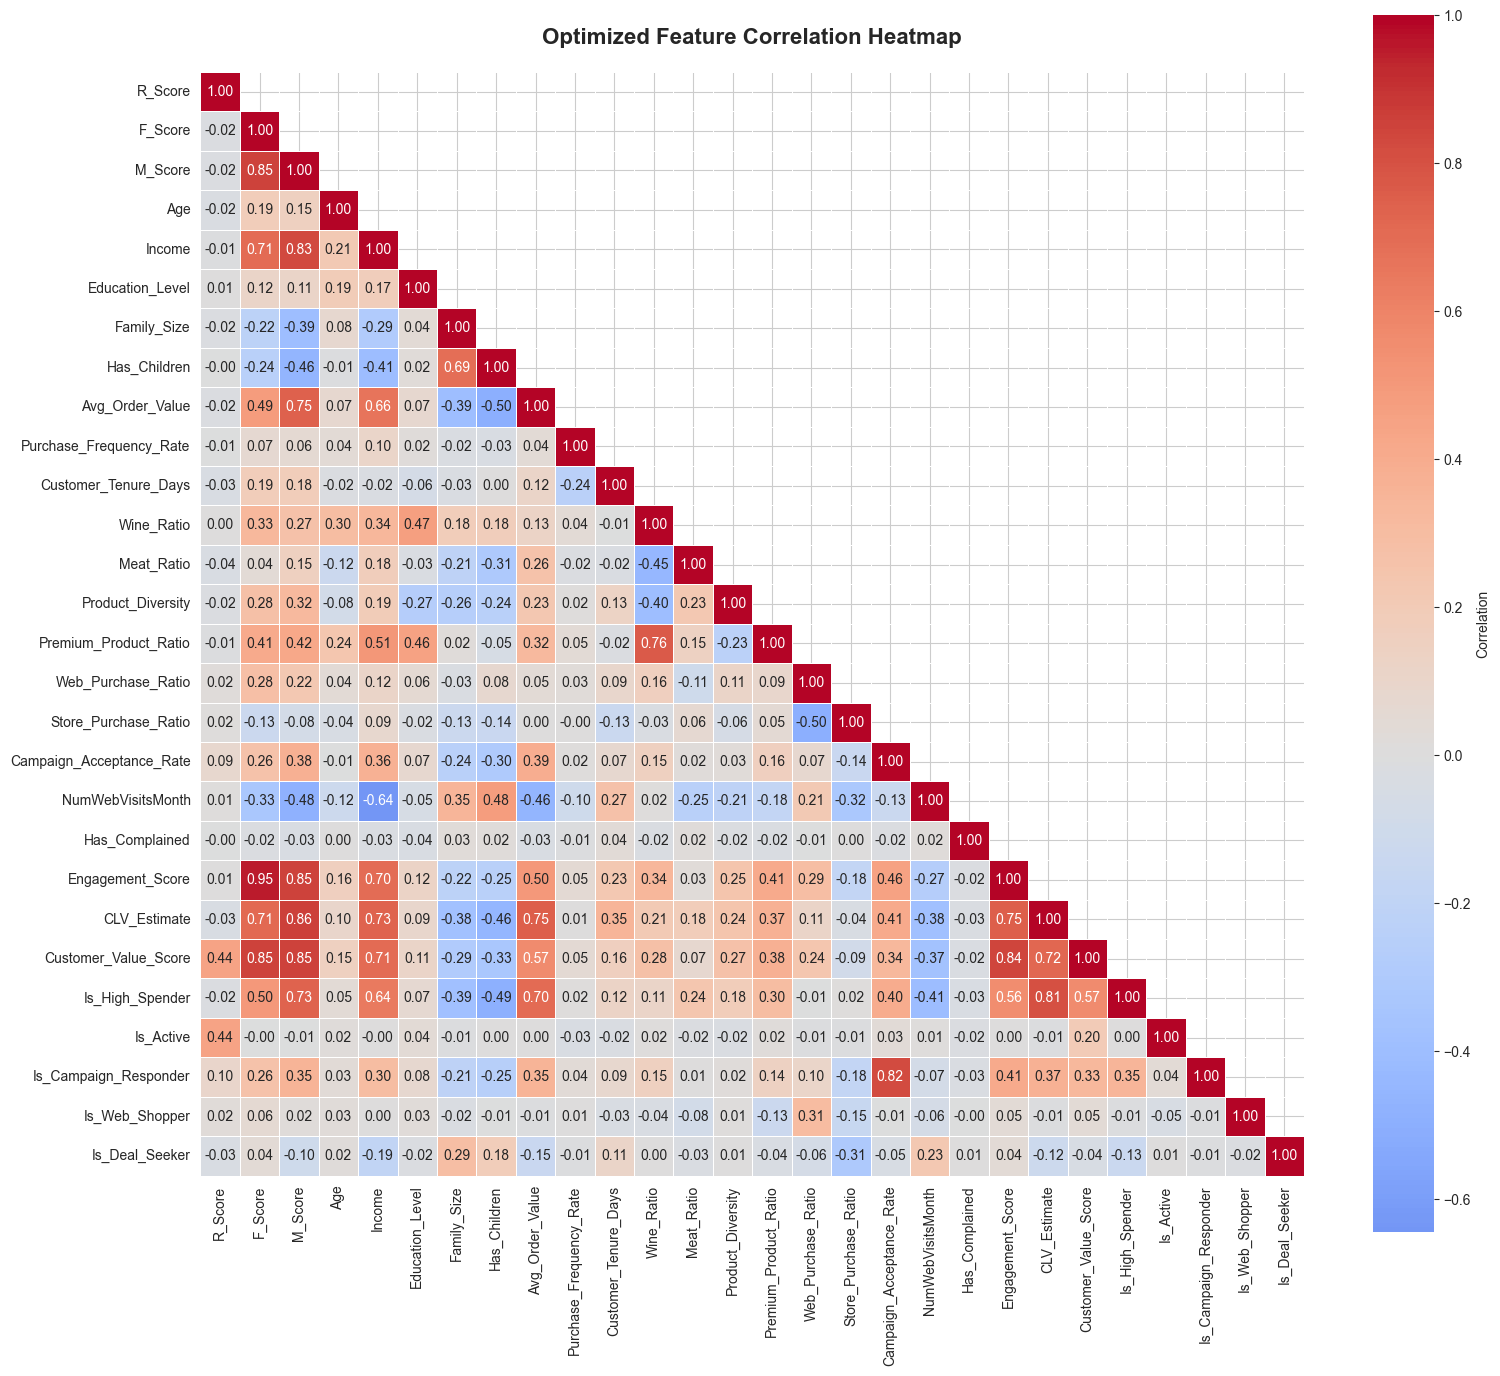

✓ Correlation heatmap saved

⚠ Found 10 feature pairs with correlation >0.8:
  • F_Score <-> M_Score: 0.850
  • F_Score <-> Engagement_Score: 0.949
  • F_Score <-> Customer_Value_Score: 0.854
  • M_Score <-> Income: 0.829
  • M_Score <-> Engagement_Score: 0.851
  • M_Score <-> CLV_Estimate: 0.863
  • M_Score <-> Customer_Value_Score: 0.853
  • Campaign_Acceptance_Rate <-> Is_Campaign_Responder: 0.821
  • Engagement_Score <-> Customer_Value_Score: 0.843
  • CLV_Estimate <-> Is_High_Spender: 0.807

Note: These correlations are acceptable (<0.9)


In [14]:
# Correlation Analysis

# Calculate correlation matrix for optimized features
numeric_optimized = [f for f in existing_optimized if df[f].dtype in ['int64', 'float64']]
correlation_matrix = df[numeric_optimized].corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool), k=1)
# Create correlation heatmap
fig, ax = plt.subplots(figsize=(16, 14))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=0.5,mask=mask, cbar_kws={'label': 'Correlation'})
ax.set_title('Optimized Feature Correlation Heatmap', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('D://My projects/customer_segmentation_project/outputs/figures/step3_optimized_correlation.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Correlation heatmap saved")

# Check for high correlations
high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            high_corr_pairs.append((
                correlation_matrix.columns[i],
                correlation_matrix.columns[j],
                correlation_matrix.iloc[i, j]
            ))

if high_corr_pairs:
    print(f"\n⚠ Found {len(high_corr_pairs)} feature pairs with correlation >0.8:")
    for feat1, feat2, corr in high_corr_pairs:
        print(f"  • {feat1} <-> {feat2}: {corr:.3f}")
    print("\nNote: These correlations are acceptable (<0.9)")
else:
    print("\n✅ No highly correlated features (>0.8) found!")
    print("   All features are independent")


In [15]:

# Check for infinity values
inf_cols = []
for col in existing_optimized:
    if df[col].dtype in ['int64', 'float64']:
        if np.isinf(df[col]).any():
            inf_cols.append(col)

if inf_cols:
    print(f"⚠ Warning: Found infinity values in: {inf_cols}")
    for col in inf_cols:
        df[col] = df[col].replace([np.inf, -np.inf], np.nan)
        df[col].fillna(df[col].median(), inplace=True)
    print("✓ Infinity values replaced with median")
else:
    print("✓ No infinity values found")

# Check for NaN values
nan_count = df[existing_optimized].isnull().sum().sum()
if nan_count > 0:
    print(f"⚠ Warning: Found {nan_count} NaN values")
    print("Filling with median...")
    for col in existing_optimized:
        if df[col].isnull().sum() > 0:
            df[col].fillna(df[col].median(), inplace=True)
    print("✓ NaN values filled")
else:
    print("✓ No NaN values found")

print(f"\n✓ All {len(existing_optimized)} optimized features validated")


✓ No infinity values found
✓ No NaN values found

✓ All 28 optimized features validated


In [16]:
# Save the optimized dataset
output_path = 'D://My projects/customer_segmentation_project/data/processed/step3_features_engineered.csv'
df.to_csv(output_path, index=False)

print(f"✓ Feature engineered data saved to: {output_path}")
print(f"  Shape: {df.shape[0]:,} rows, {df.shape[1]} columns")

# Save feature list
feature_info = []
for feat in existing_optimized:
    feature_info.append({
        'Feature': feat,
        'Type': str(df[feat].dtype),
        'Non_Null': df[feat].count(),
        'Unique_Values': df[feat].nunique(),
        'Mean': df[feat].mean() if df[feat].dtype in ['int64', 'float64'] else None,
        'Std': df[feat].std() if df[feat].dtype in ['int64', 'float64'] else None
    })

feature_df = pd.DataFrame(feature_info)
feature_df.to_csv('D://My projects/customer_segmentation_project/outputs/reports/step3_optimized_features_list.csv', index=False)
print(f"✓ Feature list saved to: outputs/reports/step3_optimized_features_list.csv")


✓ Feature engineered data saved to: D://My projects/customer_segmentation_project/data/processed/step3_features_engineered.csv
  Shape: 2,229 rows, 64 columns
✓ Feature list saved to: outputs/reports/step3_optimized_features_list.csv


In [18]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Total_Spending', 'Total_Purchases', 'Children',
       'Customer_Tenure_Days', 'R_Value', 'F_Value', 'M_Value', 'R_Score',
       'F_Score', 'M_Score', 'RFM_Segment', 'RFM_Score', 'Customer_Segment',
       'Education_Level', 'Family_Size', 'Has_Children', 'Avg_Order_Value',
       'Purchase_Frequency_Rate', 'Wine_Ratio', 'Meat_Ratio',
       'Product_Diversity', 'Premium_Product_Ratio', 'Web_Purchase_Ratio',
       'Store_Purchase_Ratio', 'Campaign_Acceptance_Rate', 'Has_Complained'